
# Module 25: DBSCAN & Hierarchical Clustering

This notebook is designed for hands-on practice.



## Dataset 1: Blob Dataset with Different Densities

This dataset contains clusters with different densities.
DBSCAN should behave differently for each cluster.


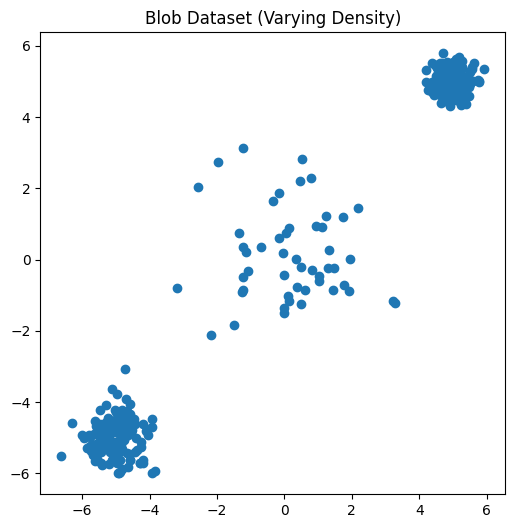

In [1]:
#Done for you
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X_blobs, _ = make_blobs(
    n_samples=[150, 50, 200],
    centers=[(-5, -5), (0, 0), (5, 5)],
    cluster_std=[0.5, 1.5, 0.3],
    random_state=42
)

plt.figure(figsize=(6,6))
plt.scatter(X_blobs[:,0], X_blobs[:,1])
plt.title("Blob Dataset (Varying Density)")
plt.show()

ব্যাখ্যা:

স্কেলিং কেন গুরুত্বপূর্ণ?​

বিভিন্ন ফিচারের মানের পরিসর (range) ভিন্ন হতে পারে, যেমন একটি ফিচার ০-১০০ এর মধ্যে থাকতে পারে, আরেকটি ০-১ এর মধ্যে। যদি আমরা স্কেল না করি, তাহলে বড় পরিসরের ফিচারগুলো ক্লাস্টারিংয়ে বেশি প্রভাব ফেলবে, যা ভুল ক্লাস্টার তৈরি করতে পারে।

স্কেল না করলে কী হবে?​

ভিন্ন স্কেলের কারণে দূরত্ব গণনা (যেমন ইউক্লিডিয়ান দূরত্ব) ভুল হবে, ফলে ক্লাস্টার ঠিকমতো গঠিত হবে না।


### TODO 1: Scaling

Scale the dataset using StandardScaler.

Think:
- Why is scaling important here?
- What happens if we skip scaling?


In [3]:
# TODO: Apply StandardScaler here
# Generate blob dataset with different densities (for illustration)
from sklearn.preprocessing import StandardScaler
X_blob, _ = make_blobs(n_samples=300, centers=3, cluster_std=[1.0, 2.5, 0.5], random_state=42)

# Scale the data
scaler = StandardScaler()
X_blob_scaled = scaler.fit_transform(X_blob)

✅ TODO ১: স্কেলিং (StandardScaler দিয়ে)
🤔 কেন স্কেলিং গুরুত্বপূর্ণ?

ক্লাস্টারিং অ্যালগরিদম (বিশেষ করে DBSCAN) পয়েন্টগুলোর মধ্যকার দূরত্ব​ ব্যবহার করে ক্লাস্টার তৈরি করে — সাধারণত ইউক্লিডিয়ান দূরত্ব।

কিন্তু:

যদি একটি ফিচারের মান ০ থেকে ১০০ হয় আর আরেকটি ০ থেকে ১ — তাহলে বড় ফিচারটি দূরত্ব গণনায় অত্যধিক প্রভাব ফেলবে।

ফলে ক্লাস্টার সঠিকভাবে তৈরি হবে না।

StandardScaler​ করে আমরা সব ফিচারকে:

গড় = 0

স্ট্যান্ডার্ড ডেভিয়েশন = 1

করে নিয়ে আসি → সব ফিচার সমান গুরুত্বপূর্ণ​ হয়।

❌ স্কেল না করলে কী হবে?

ক্লাস্টার ভুল হতে পারে।

বড় স্কেলের ফিচার বেশি প্রভাব ফেলবে → ক্লাস্টারিং বিকৃত হবে।


### TODO 2: DBSCAN on Blob Dataset

Apply DBSCAN.
Experiment with different values of eps and min_samples.


In [4]:
from sklearn.cluster import DBSCAN

# TODO: Apply DBSCAN here
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_blob_scaled)

✅ TODO ২: DBSCAN প্রয়োগ করা (ব্লব ডেটায়)
🤖 DBSCAN কী?

এটি ঘনত্বের উপর ভিত্তি করে ক্লাস্টার তৈরি করে।

যেসব পয়েন্ট খুব কম ঘন (অর্থাৎ কম প্রতিবেশী পয়েন্ট আছে) → সেগুলোকে নয়েজ (-1)​ হিসেবে চিহ্নিত করে।

ক্লাস্টারের সংখ্যা ইতিমধ্যে জানার দরকার হয় না।

⚙️ গুরুত্বপূর্ণ প্যারামিটার:

eps (ε): একটি পয়েন্টের সাথে প্রতিবেশী পয়েন্টদের সর্বোচ্চ দূরত্ব।

min_samples: একটি ক্লাস্টার হতে হলে ন্যূনতম কতজন পয়েন্ট থাকতে হবে।


### TODO 3: k-Distance Plot

Use a k-distance plot to estimate eps.


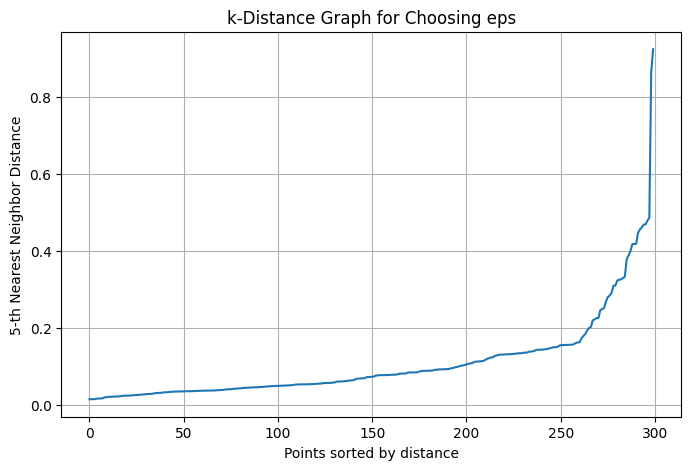

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# Choose min_samples (e.g., 5)
min_samples = 5
neigh = NearestNeighbors(n_neighbors=min_samples)
nbrs = neigh.fit(X_blob_scaled)
distances, indices = nbrs.kneighbors(X_blob_scaled)

# Sort distances to the k-th neighbor
k_distances = np.sort(distances[:, -1])

# Plot
plt.figure(figsize=(8,5))
plt.plot(k_distances)
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{min_samples}-th Nearest Neighbor Distance')
plt.title('k-Distance Graph for Choosing eps')
plt.grid()
plt.show()

ব্যাখ্যা:​

গ্রাফে যেখানে "কন্ঠা" (elbow) দেখা যায়, সেই দূরত্বটি epsএর জন্য ভালো মান হতে পারে।


## Dataset 2: Circular Dataset

This dataset contains non-linear circular clusters.


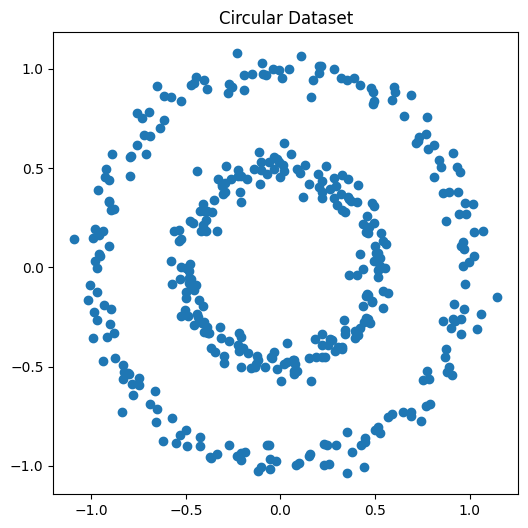

In [6]:
#Done for you
from sklearn.datasets import make_circles

X_circles, _ = make_circles(
    n_samples=400,
    factor=0.5,
    noise=0.05,
    random_state=42
)

plt.figure(figsize=(6,6))
plt.scatter(X_circles[:,0], X_circles[:,1])
plt.title("Circular Dataset")
plt.show()


### TODO 4: DBSCAN on Circular Data

Apply DBSCAN and observe cluster shape.


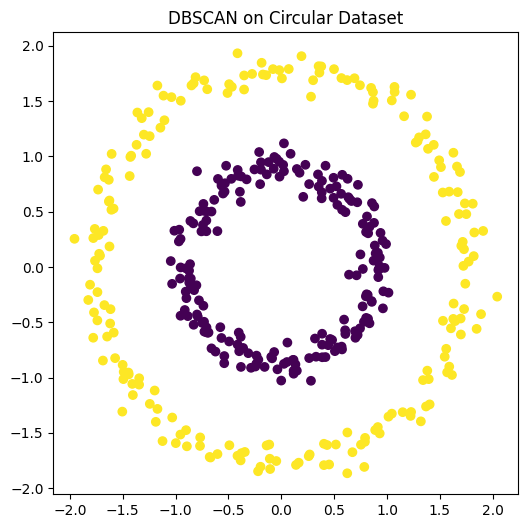

In [7]:
# TODO: Apply scaling and DBSCAN here
# Scale the circular data
scaler_circles = StandardScaler()
X_circles_scaled = scaler_circles.fit_transform(X_circles)

# Apply DBSCAN
dbscan_circles = DBSCAN(eps=0.3, min_samples=5)
clusters_circles = dbscan_circles.fit_predict(X_circles_scaled)

# Optional: Plot the clusters
plt.figure(figsize=(6,6))
plt.scatter(X_circles_scaled[:, 0], X_circles_scaled[:, 1], c=clusters_circles, cmap='viridis')
plt.title("DBSCAN on Circular Dataset")
plt.show()

DBSCAN এই বৃত্তাকার ক্লাস্টারগুলোকে আলাদা করতে পারবে, কারণ এটি অ-রৈখিক ক্লাস্টার শনাক্ত করতে সক্ষম।


## Hierarchical Clustering Practice



### TODO 5: Agglomerative Clustering

Try different linkage methods:
single, complete, average, ward


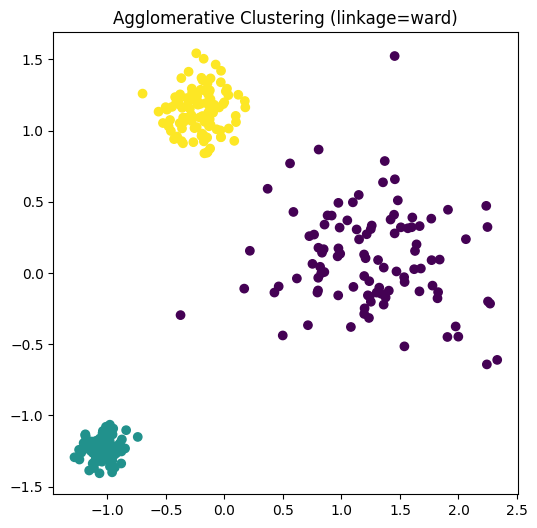

In [8]:
from sklearn.cluster import AgglomerativeClustering

# Use scaled blob data for this task
agg = AgglomerativeClustering(n_clusters=3, linkage='ward')  # try 'single', 'complete', 'average', 'ward'
clusters_agg = agg.fit_predict(X_blob_scaled)

# Optional: Plot
plt.figure(figsize=(6,6))
plt.scatter(X_blob_scaled[:, 0], X_blob_scaled[:, 1], c=clusters_agg, cmap='viridis')
plt.title(f'Agglomerative Clustering (linkage={agg.linkage})')
plt.show()

✅ TODO ৫: বিভিন্ন Linkage পদ্ধতি চেষ্টা করা

Linkage​ = ক্লাস্টারগুলোর মধ্যে দূরত্ব কিভাবে মাপা হবে।

Linkage



বর্ণনা

Single​



সবচেয়ে কাছের পয়েন্টের দূরত্ব




Complete​



সবচেয়ে দূরের পয়েন্টের দূরত্ব




Average​



গড় দূরত্ব




Ward​



ভেরিয়েন্স কমানোর মাধ্যমে (সবচেয়ে কম্প্যাক্ট ক্লাস্টার)


### TODO 6: Dendrogram

Create a dendrogram using Ward linkage.


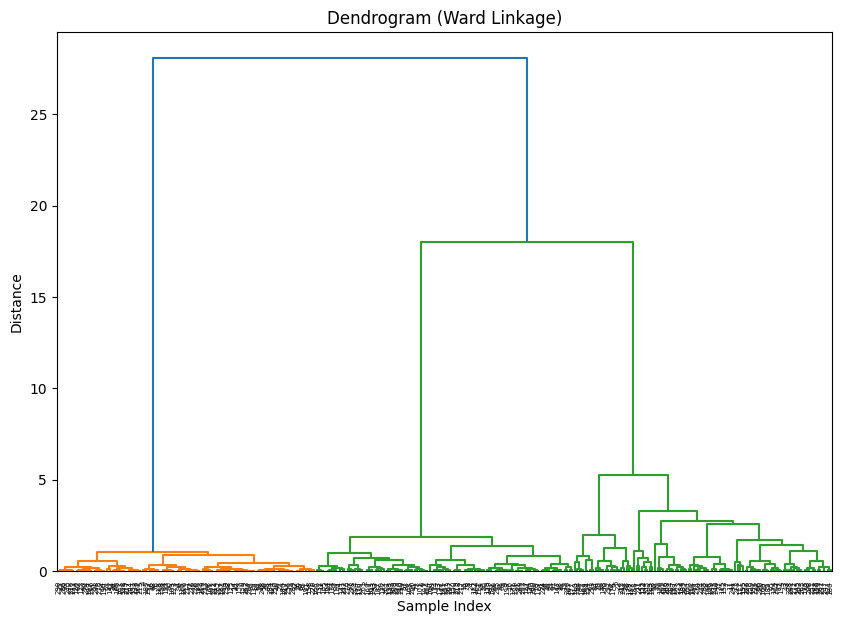

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Use linkage method 'ward' on scaled blob data
linked = linkage(X_blob_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top')
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

ব্যাখ্যা:​

ডেনড্রোগ্রাম থেকে দেখা যায় ক্লাস্টারগুলো কীভাবে একে অপরের সাথে সম্পর্কিত এবং কোথায় কাটা যায় ভালো ক্লাস্টার তৈরি করতে।


## Reflection Questions

1. Which dataset suits DBSCAN better?
2. How does eps affect noise?
3. Which linkage feels most intuitive?
4. When would you prefer hierarchical clustering?


❓ ১. কোন ডেটাসেটটি DBSCAN এর জন্য বেশি উপযুক্ত?

উত্তর:​

✅ বৃত্তাকার ডেটাসেট

কারণ:​

এতে অ-রৈখিক (non-linear)​ ক্লাস্টার আছে → যা KMeans বা সাধারণ অ্যালগরিদম ঠিকমতো শনাক্ত করতে পারে না।

DBSCAN এটি শনাক্ত করতে পারে কারণ এটি ঘনত্বের উপর ভিত্তি করে কাজ করে, আকার নিয়ে সমস্যা হয় না।

❓ ২. epsকীভাবে নয়েজের (noise) ওপর প্রভাব ফেলে?

উত্তর:​

ছোট এপস (eps):​ কম সংখ্যক পয়েন্ট প্রতিবেশী হয় → বেশি পয়েন্ট নয়েজ হয়ে যায় (-1)।

বড় এপস (eps):​ বিভিন্ন ক্লাস্টার একসাথে মিশে যেতে পারে → ভুল ক্লাস্টার তৈরি হতে পারে।

✅ সঠিক epsবেছে নিলে ক্লাস্টার ঠিকমতো গঠিত হয় এবং আসল নয়েজ আলাদা থাকে।

❓ ৩. কোন linkage পদ্ধতিটি বোঝা সহজ?

উত্তর:​

✅ Ward linkage

কারণ:​

এটি ভেরিয়েন্স কমানোর চেষ্টা করে → ক্লাস্টার কম্প্যাক্ট হয় (একসাথে সংকুচিত)।

এটি KMeans এর মতো অনুভূত হয়।

অন্যগুলো:

Single:​ দীর্ঘ চেইনের মতো ক্লাস্টার তৈরি করতে পারে।

Complete / Average:​ ভালো, কিন্তু ভিন্ন আচরণ করে।

❓ ৪. কখন আপনি স্তরযুক্ত ক্লাস্টারিং পছন্দ করবেন?

উত্তর:​

আপনি যদি:

ক্লাস্টারের স্তরযুক্ত সম্পর্ক​ বুঝতে চান,

ক্লাস্টারের সংখ্যা ইতিমধ্যে জানা না থাকলে,

ডেটাসেট ছোট বা মাঝারি আকারের​ হয়,

ক্লাস্টারগুলোর শ্রেণিবিন্যাসগত সম্পর্ক​ বুঝতে